# Evolutionary multiobjective optimization

LEAP currently directly supports one form of multiobjective optimization, NSGA-II, but there is intent to implement other common evolutionary multiobjective algorithms.

## Naive evolutionary multiobjective optimization

A naive approach to evolutionary multiobjective optimization would be to simply sum up the fitnesses, biased by a weight, as a final, single fitness, $f(x)$:

$f(x) = \sum \limits_{i=0}^n w_i f_i$

Where $f_i$ is the fitness for objective _i_.

However, there isn't very satisfying because we have to decide on $w_i$, which we usually don't know. A better approach would be to evolve solutions along a Pareto front where each solution on the front dominates other solutions.

## NSGA-II

The NSGA-II algorithm is just one such evolutionary multiobjective optimization (MO) algorithm.

Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan.
"A Fast and Elitist Multiobjective Genetic Algorithm: NSGA-II." IEEE
transactions on evolutionary computation 6, no. 2 (2002): 182-197.


In [2]:
import sys
import pandas as pd

from leap_ec.representation import Representation
from leap_ec.ops import tournament_selection, clone, evaluate, pool
from leap_ec.real_rep.initializers import create_real_vector
from leap_ec.real_rep.ops import mutate_gaussian
from leap_ec.probe import print_individual

from leap_ec.multiobjective.nsga2 import nsga_2
from leap_ec.multiobjective.problems import SCHProblem

In [3]:
POP_SIZE=20
MAX_GENERATIONS=100

In [4]:
sch_problem = SCHProblem() # TODO expand these separately with explanation
sch_representation = Representation(initialize=create_real_vector(bounds=[(-10, 10)]))

In [5]:
pipeline = [tournament_selection, 
            clone, 
            mutate_gaussian(std=0.5, expected_num_mutations=1),
            evaluate,
            print_individual,
            pool(size=POP_SIZE)]

In [6]:
final_pop = nsga_2(max_generations=MAX_GENERATIONS, 
                   pop_size=POP_SIZE, 
                   problem=sch_problem, 
                   representation=sch_representation,
                   pipeline=pipeline)

[-1.50005689] [ 2.25017067 12.25039822]
[-1.11633894] [1.24621263 9.71156838]
[-3.63751756] [13.23153399 31.78160423]
[3.19324721] [10.19682775  1.42383891]
[-3.62620291] [13.14934752 31.65415915]
[2.70069489] [7.29375288 0.49097333]
[-3.8264135] [14.64144031 33.94709432]
[0.3466677] [0.12017849 2.73350769]
[0.21564468] [0.04650263 3.18392389]
[-5.24100483] [27.46813167 52.43215101]
[4.37179191] [19.11256452  5.62539687]
[-1.68198833] [ 2.82908474 13.55703805]
[1.57820366] [2.49072678 0.17791215]
[-1.15287022] [1.32910974 9.94059061]
[1.3269889] [1.76089955 0.45294393]
[2.76922441] [7.66860385 0.5917062 ]
[0.58509951] [0.34234144 2.00194339]
[-0.34045557] [0.11591    5.47773229]
[-2.65158497] [ 7.03090288 21.63724278]
[3.4243431] [11.72612569  2.02875328]
[-1.26921282] [ 1.61090117 10.68775244]
[1.56218581] [2.44042451 0.19168126]
[3.02245471] [9.13523247 1.04541363]
[0.47320273] [0.22392082 2.33110991]
[3.09858832] [9.60124956 1.20689629]
[2.51269162] [6.31361916 0.26285269]
[1.156085

[0.8216085] [0.67504053 1.38860653]
[1.99814869] [3.99259819e+00 3.42734461e-06]
[1.57909313] [2.49353512 0.17716259]
[1.21086696] [1.46619879 0.62273096]
[0.81821579] [0.66947708 1.39661392]
[0.81475506] [0.66382581 1.40480557]
[2.3167701] [5.36742371 0.1003433 ]
[1.49807286] [2.2442223  0.25193085]
[1.14192909] [1.30400206 0.73628568]
[-0.52370997] [0.27427213 6.36911199]
[1.85151054] [3.42809126 0.02204912]
[1.68771525] [2.84838278 0.09752176]
[1.25965442] [1.58672927 0.54811157]
[1.41412123] [1.99973886 0.34325393]
[2.13741144] [4.56852767 0.0188819 ]
[-0.07569242] [0.00572934 4.30849902]
[0.96276424] [0.92691498 1.07585802]
[1.05999339] [1.12358598 0.88361243]
[1.71421975] [2.93854936 0.08167035]
[0.96718611] [0.93544897 1.06670453]
[0.87833621] [0.7714745  1.25812966]
[1.74971086] [3.06148808 0.06264466]
[1.03385558] [1.06885736 0.93343504]
[1.15822158] [1.34147722 0.70859091]
[1.21568456] [1.47788895 0.61515071]
[2.30310862] [5.30430932 0.09187484]
[0.62434194] [0.38980286 1.892

[1.74340486] [3.0394605  0.06584107]
[0.83327535] [0.69434781 1.3612464 ]
[0.01025317] [1.05127476e-04 3.95909245e+00]
[0.26738174] [0.071493   3.00196602]
[1.68407745] [2.83611686 0.09980706]
[0.43904101] [0.19275701 2.43659296]
[1.27981296] [1.63792121 0.51866938]
[0.96208156] [0.92560092 1.0772747 ]
[1.58405556] [2.50923203 0.17300977]
[1.29385389] [1.67405789 0.49864233]
[2.63934078] [6.96611977 0.40875664]
[1.80703009] [3.26535775 0.03723739]
[1.62628012] [2.64478703 0.13966655]
[0.61919607] [0.38340377 1.9066195 ]
[-0.22269521] [0.04959316 4.94037402]
[0.49421491] [0.24424838 2.26738873]
[1.5644439] [2.44748471 0.18970912]
[-0.1768597] [0.03127935 4.73871813]
[1.21730536] [1.48183234 0.6126109 ]
[1.78656151] [3.19180204 0.04555599]
[-0.27129438] [0.07360064 5.15877816]
[0.93485672] [0.8739571 1.1345302]
[-0.07691464] [0.00591586 4.31357444]
[-0.34816025] [0.12121556 5.51385658]
[1.00514492] [1.0103163  0.98973664]
[1.1383932] [1.29593909 0.74236627]
[1.02682158] [1.05436255 0.947

[-0.14457554] [0.02090209 4.59920423]
[1.64345855] [2.70095602 0.1271218 ]
[1.20166496] [1.44399866 0.63733884]
[0.46013545] [0.21172464 2.37118282]
[2.30217405] [5.30000537 0.09130916]
[2.54447335] [6.47434464 0.29645123]
[0.58037288] [0.33683268 2.01534116]
[2.80510734] [7.86862721 0.64819784]
[0.73437664] [0.53930905 1.60180249]
[0.85694655] [0.73435739 1.30657119]
[0.70481852] [0.49676915 1.67749505]
[1.719997] [2.95838967 0.07840168]
[0.45575274] [0.20771056 2.3846996 ]
[1.51192463] [2.28591609 0.23821757]
[2.75552306] [7.59290733 0.57081509]
[1.69841547] [2.88461511 0.09095323]
[1.12169832] [1.25820713 0.77141383]
[0.97768735] [0.95587255 1.04512315]
[1.37368308] [1.8870052  0.39227289]
[1.88802786] [3.56464921 0.01253776]
[0.61963484] [0.38394734 1.90540797]
[0.30501901] [0.0930366  2.87296056]
[0.2809036] [0.07890683 2.95529243]
[2.40107533] [5.76516272 0.16086142]
[-0.70844725] [0.5018975  7.33568649]
[0.58667338] [0.34418566 1.99749212]
[0.66427823] [0.44126556 1.78415265]
[0

[1.19427611] [1.42629543 0.64919098]
[1.6003699] [2.56118381 0.15970422]
[1.00461491] [1.00925111 0.99079148]
[2.5566776] [6.53660034 0.30988995]
[1.99412098] [3.9765185e+00 3.4562838e-05]
[1.33928688] [1.79368936 0.43654182]
[0.42067613] [0.17696841 2.49426388]
[0.7906534] [0.6251328  1.46251919]
[1.04566952] [1.09342475 0.91074666]
[0.51520725] [0.26543852 2.2046095 ]
[0.88177122] [0.77752049 1.2504356 ]
[0.72019181] [0.51867624 1.63790901]
[1.33515978] [1.78265165 0.44201251]
[0.63671825] [0.40541014 1.85853712]
[0.76600787] [0.58676806 1.52273657]
[-0.10132057] [0.01026586 4.41554813]
[2.30295673] [5.30360972 0.09178278]
[2.0761774] [4.31051258 0.005803  ]
[1.43646662] [2.06343636 0.31756987]
[1.67849621] [2.81734952 0.10336469]
[0.84098844] [0.70726155 1.3433078 ]
[1.22286212] [1.49539176 0.60394328]
[1.40440688] [1.97235867 0.35473117]
[1.00037098] [1.00074211 0.99925817]
[1.07479883] [1.15519251 0.85599721]
[3.20276847] [10.25772586  1.44665199]
[1.16525025] [1.35780815 0.696807

[1.43490381] [2.05894893 0.31933371]
[-0.53810066] [0.28955233 6.44195498]
[1.01864691] [1.03764152 0.9630539 ]
[1.33098973] [1.77153367 0.44757473]
[0.39123725] [0.15306659 2.58811757]
[0.92436406] [0.85444891 1.15699268]
[0.97666775] [0.9538799  1.04720889]
[0.52435207] [0.27494509 2.17753682]
[2.42612902] [5.88610202 0.18158594]
[1.44842777] [2.097943   0.30423192]
[0.93449896] [0.8732883  1.13529247]
[1.02944651] [1.05976011 0.94197408]
[1.98448308] [3.93817308e+00 2.40774960e-04]
[1.48866129] [2.21611243 0.26146728]
[1.36210325] [1.85532527 0.40691226]
[1.09386516] [1.19654099 0.82108034]
[2.25126145] [5.06817814 0.06313232]
[2.08233944] [4.33613753 0.00677978]
[0.77850519] [0.60607033 1.49204958]
[-0.03526462] [1.24359335e-03 4.14230207e+00]
[0.16404449] [0.0269106  3.37073262]
[1.49724568] [2.24174464 0.2527619 ]
[1.13483512] [1.28785075 0.74851027]
[2.45024307] [6.00369112 0.20271883]
[2.43120096] [5.91073809 0.18593427]
[1.09959458] [1.20910824 0.81072992]
[1.75428598] [3.0775

[0.53008509] [0.2809902  2.16064984]
[1.44963957] [2.10145487 0.30289661]
[1.13749304] [1.29389041 0.74391826]
[-0.2908325] [0.08458354 5.24791355]
[2.25392766] [5.08018989 0.06447926]
[2.38354386] [5.68128131 0.14710589]
[-0.74997335] [0.56246002 7.56235342]
[0.51483765] [0.26505781 2.2057072 ]
[1.41370136] [1.99855152 0.3437461 ]
[0.84667913] [0.71686555 1.33014902]
[1.19008045] [1.41629148 0.65596967]
[0.90437907] [0.8179015  1.20038522]
[1.60053] [2.56169629 0.15957628]
[-0.11496431] [0.01321679 4.47307404]
[2.52600413] [6.38069685 0.27668034]
[1.27568381] [1.62736918 0.52463394]
[0.27633216] [0.07635947 2.97103081]
[0.53988512] [0.29147594 2.13193547]
[-0.58354766] [0.34052787 6.6747185 ]
[0.25485932] [0.06495327 3.045516  ]
[2.00391624] [4.01568030e+00 1.53369418e-05]
[0.73314525] [0.53750196 1.60492095]
[1.35197522] [1.82783698 0.41993612]
[1.36060815] [1.85125455 0.40882193]
[-0.7770167] [0.60375495 7.71182175]
[1.46445129] [2.14461759 0.28681242]
[0.72065279] [0.51934044 1.636

[0.68452657] [0.46857662 1.73047035]
[0.67943226] [0.46162819 1.74389916]
[0.60465126] [0.36560314 1.94699812]
[1.20112688] [1.44270577 0.63819827]
[0.75427383] [0.56892902 1.55183368]
[1.30586845] [1.70529241 0.48181861]
[2.2842604] [5.21784557 0.08080397]
[1.35674124] [1.84074678 0.41378184]
[-0.64910111] [0.42133225 7.01773667]
[0.88346397] [0.78050858 1.24665272]
[1.53168316] [2.34605329 0.21932067]
[1.885431] [3.55485006 0.01312606]
[1.22606167] [1.50322722 0.59898054]
[1.37140379] [1.88074836 0.39513319]
[1.56442073] [2.44741221 0.1897293 ]
[0.88079215] [0.77579481 1.25262622]
[1.35628099] [1.83949813 0.41437416]
[0.57250799] [0.3277654  2.03773345]
[1.39776317] [1.95374188 0.3626892 ]
[1.72066805] [2.96069854 0.07802634]
[0.31792844] [0.10107849 2.82936473]
[0.71882083] [0.51670338 1.64142007]
[1.64128417] [2.69381373 0.12867705]
[1.19722576] [1.43334953 0.64444648]
[2.51144208] [6.30734133 0.261573  ]
[2.11292301] [4.46444365 0.01275161]
[2.05659534] [4.22958439e+00 3.20303249e

[1.96830237] [3.87421422e+00 1.00473982e-03]
[1.30582124] [1.7051691  0.48188416]
[1.79651794] [3.22747672 0.04140495]
[-0.43636585] [0.19041516 5.93587856]
[1.76108387] [3.10141639 0.05708092]
[0.18190255] [0.03308854 3.30547835]
[0.48820598] [0.23834508 2.28552116]
[0.55286425] [0.30565888 2.09420187]
[0.44639016] [0.19926418 2.41370353]
[1.38316959] [1.91315811 0.38047976]
[1.31841534] [1.738219   0.46455765]
[0.54011611] [0.29172541 2.13126097]
[0.08069003] [0.00651088 3.68375076]
[0.8437762] [0.71195828 1.33685347]
[1.09377499] [1.19634374 0.82124376]
[-1.69045988] [ 2.85765462 13.61949416]
[-0.48356814] [0.23383814 6.1681107 ]
[1.8372335] [3.37542693 0.02649293]
[1.90417465] [3.62588109 0.0091825 ]
[0.26809787] [0.07187647 2.999485  ]
[0.49321365] [0.2432597  2.27040511]
[2.8792815] [8.29026196 0.77313596]
[1.44016301] [2.0740695  0.31341746]
[0.06217237] [0.0038654  3.75517592]
[2.55212283] [6.51333095 0.30483962]
[1.49935545] [2.24806677 0.25064497]
[0.40104871] [0.16084006 2.5

In [7]:
data = [(x.genome[0], x.fitness[0], x.fitness[1]) for x in final_pop]

In [8]:
df = pd.DataFrame(data)

In [10]:
df.columns = ['Gene','f1','f2']

In [11]:
df

,Gene,f1,f2
0,-0.002361,0.000006,4.009450e+00
1,1.999759,3.999038,5.786090e-08
2,0.493214,0.243260,2.270405e+00
3,1.326466,1.759512,4.536483e-01
4,1.242552,1.543935,5.737276e-01
5,0.228089,0.052025,3.139668e+00
6,0.325029,0.105644,2.805527e+00
7,1.154961,1.333935,7.140907e-01
8,1.546402,2.391360,2.057508e-01
9,0.588509,0.346343,1.992306e+00


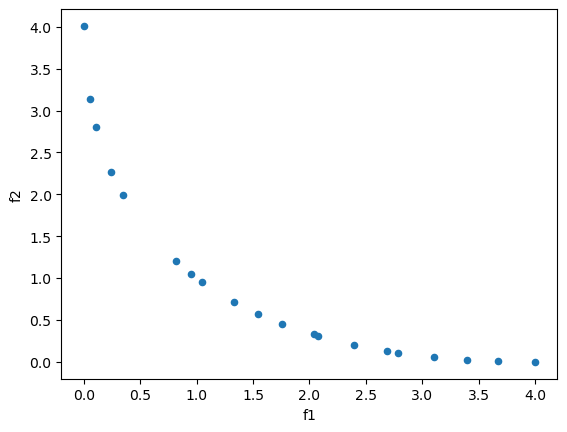

In [15]:
pareto_fig = df.plot(x='f1',y='f2',kind='scatter')

In [16]:
pareto_fig.figure.savefig('pareto.png')